# Wine Data: Comparison of different classification methods

Sample project using a dataset from UC Irvine Machinelearning Repository. 
- 3 Different Wine Types
- 13 attributes (Chemical analysis of the wines)
- Dataset can be obtained from: https://archive.ics.uci.edu/ml/datasets/wine

Classification Methods Compard
- Linear Discriminant Analysis 
- RandomForest
- AdaBoost 
- K-Nearest-Neighbors





## 1. Preparation: Import of required Python packages

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import preprocessing


In [16]:
#path = 'C:\\Pythontest Anaconda\\Statquest\\projects\\wine\\'
#ROOT_DIR = os.path.realpath(os.path.join(os.path.dirname(__file__), '..', ))    #Deprecated
ROOT_DIR = os.path.realpath(os.path.join(os.path.abspath(''), '..', ))

df_data_raw = pd.read_csv(ROOT_DIR + '\\00_data\\' + 'wine.data')

names = ['WineClass',
         'Alcohol'
 	, 'Malic acid'
 	, 'Ash'
	, 'Alcalinity of ash'
 	, 'Magnesium'
	, 'Total phenols'
 	, 'Flavanoids'
 	, 'Nonflavanoid phenols'
 	, 'Proanthocyanins'
	,'Color intensity'
 	,'Hue'
 	,'OD/OD of diluted wines'
 	,'Proline']

df_data_raw.columns = names

##### Show dataframe

In [17]:
df_data_raw

,WineClass,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD/OD of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


##### Outline of the data
- n = 177 Observations in the dataset 
- p = 13 independent variables / attributes
- y (Dependent Attribute 'WineClass') can take values [1,2,3] -> Represents three different types of wine


##### Further analysis
 - Check missing --> Seemingly no columns have missing values
 - Create dummies --> Not necessary, no categorical variables, all float



### Modeling Prep: Split into X and y
Here we simply split the set into 
- the independent variables, which we will use for prediction (X)
- the dependent variable, which we aim to predict (y)

In [18]:
X = df_data_raw.drop(columns = 'WineClass')
names = names[1:]
y = df_data_raw['WineClass']

### Split X into Train and test

The different classification methods we compare will require to split the Dataset into two smaller sets: Training and test.

- The training set "X_train" will be used for model creation. 
- The testing set "X_test" (data yet unknown to the model) will be used to evaluate the model performance, eg. with a confusion matrix.

The proportion of training to test data is the scikit-learn default (75% - 25%)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train.head()
X_test.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD/OD of diluted wines,Proline
19,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
45,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
139,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
30,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
67,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750






## 2. Exploratory Data Analysis
### Principle Component Analysis

Principle Component Analysis is a method of dimension reduction. It combines the 13 attributes in the original dataset into a smaller number of attributes. By doing this, the dataset can be visualized in a 2D-Plot and we will receive an evaluation, which of the attributes most explain the variance in the data.

In [20]:
X_transformed = preprocessing.scale(X) #Preparation. PCA requires the  data in scaled form.

pca = PCA(n_components = 10)
pca.fit(X_transformed)
data_pca_transformed = pca.transform(X_transformed)

How many Principal Components do we need to show? To decide, we create a  Scree Plot: It shows the different Principal Components and the percentage of data variance they each explain.

Our ideally situation would be a small number of Principal Components which still explain a lot of the variance

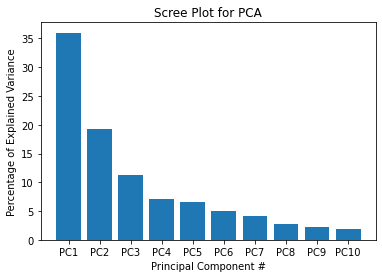

In [21]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1 )
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

plt.bar(x = range (1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel ('Principal Component #')
plt.title('Scree Plot for PCA')
plt.show()

Evaluation of Scree Plot: Which percentage of variation does each Principal Component explain?
- PC1: Explains 35% of data variance
- PC2 ~20, PC3 ~12%. 

--> Focus on PC1 and PC2 (James et al.: "smallest number of principal components that are required in order to explain a sizable amount of the variation in the data)


### PCA Evaluation: Check loading scores

We display the loading scores of the attributes in the principal components. A high loadingscore for an attribute signifies that a large percentage of the variation in the data is due to this attribute

In [22]:
loading_scores = pd.Series(pca.components_[0], index = names)
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
top_10_attributes = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_attributes])

Flavanoids                0.424394
Total phenols             0.395869
OD/OD of diluted wines    0.377203
Proanthocyanins           0.312803
Hue                       0.299565
Nonflavanoid phenols     -0.299136
Proline                   0.284281
Malic acid               -0.246381
Alcalinity of ash        -0.237380
Alcohol                   0.137888
dtype: float64


Evaluation of Loadingscores: No one attribute with the strongest loadingscore stands out of the analysis


### PCA Evaluation: Plot of the Data 

Plot the observations with there attributes expressed as Principal Components PC1 and PC2

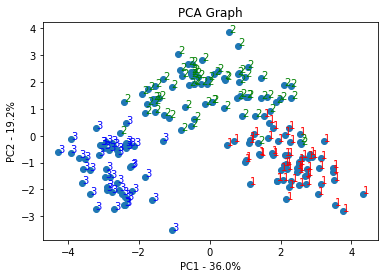

In [23]:
df_pca = pd.DataFrame(data_pca_transformed, columns = labels) #For plotting: Extract data out of PCA-Transformation (numpy-array) into Pandas dataframe --> Has indices and labels

plt.scatter(df_pca.PC1, df_pca.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in df_pca.index:
     #plt.annotate(sample, (df_pca.PC1.loc[sample], df_pca.PC2.loc[sample]))
     #plt.annotate(sample, (df_data_raw.WineClass.loc[sample]))
    colors = ["y", "r","g","b"]
    
    plt.annotate(
         xy = (df_pca.PC1.loc[sample], df_pca.PC2.loc[sample]),
         text = df_data_raw.WineClass[sample], 
         color = colors[df_data_raw.WineClass[sample]]        
         )
     
plt.show()





## 3. Comparison of Classification Methods

Having cleaned and explored the data, we can now apply the different classification methods.

For each we will evaluate their performance using a confusion matrix. Later we will compare the methods.

### First model: Random Forest Classifier

In [24]:
clf_rf = RandomForestClassifier(max_depth=2, random_state = 42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

##### Confusionmatrix for Test Set Predictions

We just  created and fitted the model on the training data ("X_test"). 

Text(0.5, 1.0, 'Confusion Matrix for Random Forest: Relative Values')

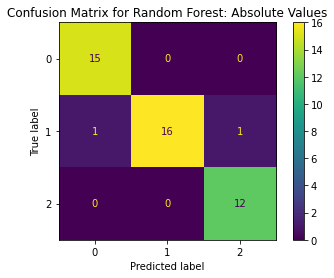

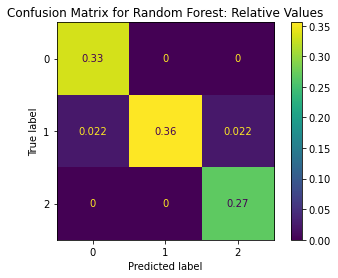

In [25]:
predictions_rf = clf_rf.predict(X_test)

##Confusion Matrix for Random Forest: Absolute Valuesa
cm_rf = confusion_matrix(y_test, predictions_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf)
disp_rf.plot()
disp_rf.ax_.set_title('Confusion Matrix for Random Forest: Absolute Values')



#Confusion Matrix for Random Forest: Relative Values
cm_rf = confusion_matrix(y_test, predictions_rf, normalize = 'all')
disp_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf)
disp_rf.plot()
disp_rf.ax_.set_title('Confusion Matrix for Random Forest: Relative Values')


Evaluation: Prediction using RandomForest is quite good out of the box --> Likely the dataset is not challenging

##### Comparison with AdaBoost Classifier

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost: Relative Values')

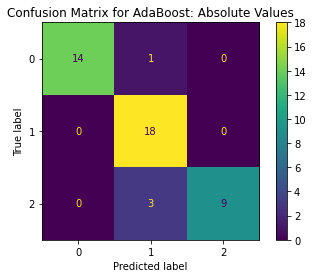

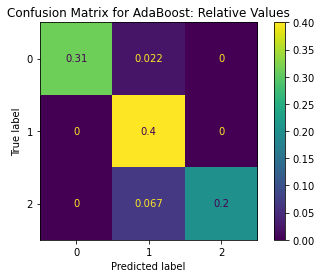

In [26]:
clf_ada = AdaBoostClassifier(n_estimators = 5000, random_state = 42)
clf_ada.fit (X_train, y_train)

predictions_ada = clf_ada.predict(X_test)


##Confusion Matrix for AdaBoost: Absolute Values
cm_ada = confusion_matrix(y_test, predictions_ada)
disp_ada = ConfusionMatrixDisplay(confusion_matrix = cm_ada)
disp_ada.plot()
disp_ada.ax_.set_title('Confusion Matrix for AdaBoost: Absolute Values')

##Confusion Matrix for AdaBoost: Relative Values
cm_ada = confusion_matrix(y_test, predictions_ada, normalize = 'all')
disp_ada = ConfusionMatrixDisplay(confusion_matrix = cm_ada)
disp_ada.plot()
disp_ada.ax_.set_title('Confusion Matrix for AdaBoost: Relative Values')

##### Comparison with k-nearest-neighbours - Classification

Text(0.5, 1.0, 'Confusion Matrix for K-Nearest Neighbors: Relative Values')

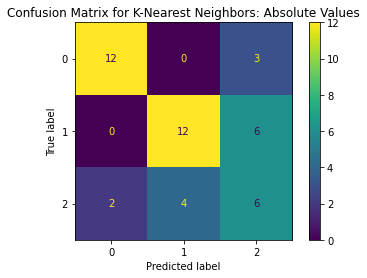

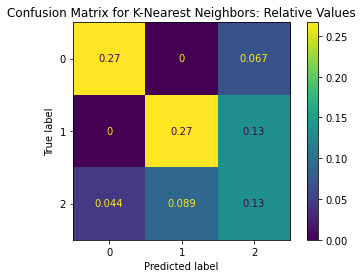

In [27]:
clf_knn = KNeighborsClassifier(n_neighbors = 10)
clf_knn.fit(X_train, y_train)

predictions_knn = clf_knn.predict(X_test)


##Confusion Matrix for K-Nearest Neighbors: Absolute Values
cm_knn = confusion_matrix(y_test, predictions_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp_knn.plot()
disp_knn.ax_.set_title('Confusion Matrix for K-Nearest Neighbors: Absolute Values')

##Confusion Matrix for K-Nearest Neighbors: Relative Values
cm_knn = confusion_matrix(y_test, predictions_knn, normalize = 'all')
disp_knn = ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp_knn.plot()
disp_knn.ax_.set_title('Confusion Matrix for K-Nearest Neighbors: Relative Values')



##### Comparison with Linear Discriminant Analysis

Text(0.5, 1.0, 'Linear Discriminant Analysis: Relative Values')

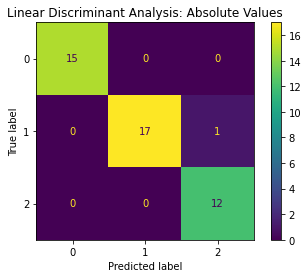

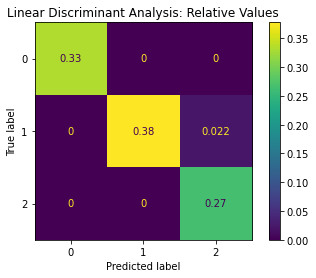

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)

predictions_lda = clf_lda.predict(X_test)

##Confusion Matrix for Linear Discriminant Analysis: Absolute Values
cm_lda = confusion_matrix(y_test, predictions_lda)
disp_lda = ConfusionMatrixDisplay(confusion_matrix = cm_lda)
disp_lda.plot()
disp_lda.ax_.set_title('Linear Discriminant Analysis: Absolute Values')

##Confusion Matrix for Linear Discriminant Analysis: Relative Values
cm_lda = confusion_matrix(y_test, predictions_lda, normalize = 'all')
disp_lda = ConfusionMatrixDisplay(confusion_matrix = cm_lda)
disp_lda.plot()
disp_lda.ax_.set_title('Linear Discriminant Analysis: Relative Values')







## 4. Evaluation / Method Comparison

- In general the classification task seems to be not too challenging. All methods had an acceptable performance.
- Comparison
    - Linear Discriminant Analysis has the best performance
    - RandomForest performs slightly better on predicting observations with WineCategory == 1
    - AdaBoost performs slightly better on predicting observations with WineCategory == 1 or == 3
    - K-Nearest-Neighbors (k = 10) has a sub-par performance